**Transfer learning (TL)** is a technique in machine learning (ML) in which knowledge learned from a task is re-used in order to boost performance on a related task. For example, for image classification, knowledge gained while learning to recognize cars could be applied when trying to recognize trucks.

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Pretrained model from tensorflow mobilenet

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

### Data visualization

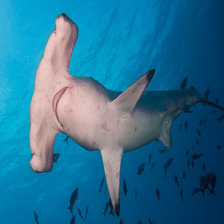

In [4]:
hammer_head = Image.open('hammerhead.jpeg').resize(IMAGE_SHAPE)
hammer_head

In [5]:
hammer_head = np.array(hammer_head)/255.0
hammer_head.shape

(224, 224, 3)

In [6]:
hammer_head

array([[[0.19607843, 0.6745098 , 0.83529412],
        [0.2       , 0.68627451, 0.84705882],
        [0.18431373, 0.68235294, 0.84313725],
        ...,
        [0.        , 0.2       , 0.34509804],
        [0.00784314, 0.20392157, 0.34901961],
        [0.00784314, 0.20392157, 0.34117647]],

       [[0.19607843, 0.67843137, 0.83921569],
        [0.19215686, 0.67843137, 0.84313725],
        [0.18431373, 0.67843137, 0.84313725],
        ...,
        [0.00392157, 0.20392157, 0.34901961],
        [0.00784314, 0.20392157, 0.34901961],
        [0.00784314, 0.20392157, 0.34117647]],

       [[0.20784314, 0.68627451, 0.84705882],
        [0.19215686, 0.67843137, 0.83921569],
        [0.17254902, 0.6745098 , 0.83137255],
        ...,
        [0.00392157, 0.20392157, 0.34901961],
        [0.00784314, 0.20392157, 0.34509804],
        [0.        , 0.19607843, 0.33333333]],

       ...,

       [[0.00392157, 0.44313725, 0.63921569],
        [0.00392157, 0.43921569, 0.63529412],
        [0.00392157, 0

In [7]:
hammer_head[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
#take multiple labels
result = classifier.predict(hammer_head[np.newaxis, ...])
result.shape

1/1 [==============================] - 5s 5s/step


(1, 1001)

In [9]:
result

array([[ 0.24363008,  0.49543822,  1.6769314 , ..., -1.0639021 ,
        -1.2856512 ,  0.707591  ]], dtype=float32)

In [42]:
#show highest prediction value with argmax function
predicted_label_index = np.argmax(result)
predicted_label_index

5

In [11]:
# Show all labels from pretrained model
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'hammerhead'

#### import flower samples

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photo.tgz"
data_dir = tf.keras.utils.get_file('flower_photo', origin = dataset_url, cache_dir ='.', untar=True)
data_dir

'.\\datasets\\flower_photo'

In [14]:
#change into windwos path object
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photo')

In [15]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photo/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photo/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photo/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photo/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photo/daisy/10172636503_21bededa75_n.jpg')]

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [17]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photo/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photo/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photo/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photo/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photo/roses/110472418_87b6a3aa98_m.jpg')]

In [18]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photo/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photo/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photo/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photo/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photo/tulips/10163955604_ae0b830975_n.jpg')]

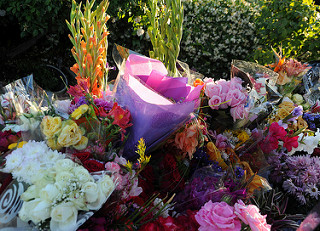

In [19]:
Image.open(str(roses[3]))

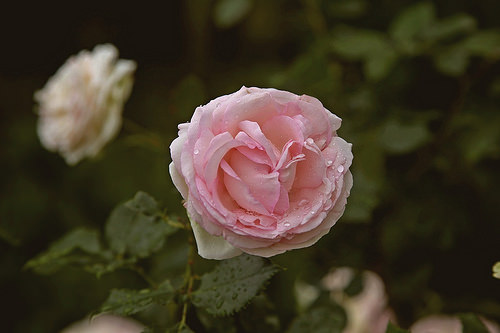

In [20]:
Image.open(str(roses[100]))

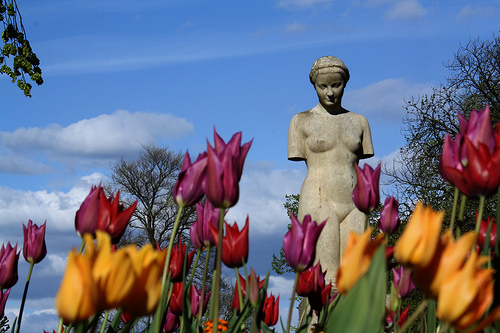

In [21]:
Image.open(str(tulips[100]))

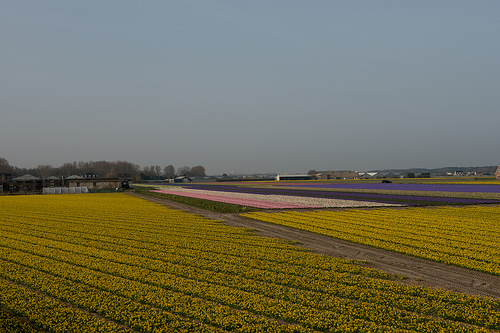

In [22]:
Image.open(str(tulips[69]))

In [23]:
#Make dictionary of flower types
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
#Make dictionary of label
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
#string path
str(flowers_images_dict['roses'][0])

'datasets\\flower_photo\\roses\\10090824183_d02c613f10_m.jpg'

In [26]:
#convert it into image data
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [27]:
img.shape

(240, 179, 3)

In [28]:
#resize
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [29]:
# append into x and y!
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])



In [30]:
x[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [31]:
x[0]/255

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [32]:
# assign to x and y
x = np.array(x)
y = np.array(y)

## Train_test_split method

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Data scaling

In [34]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

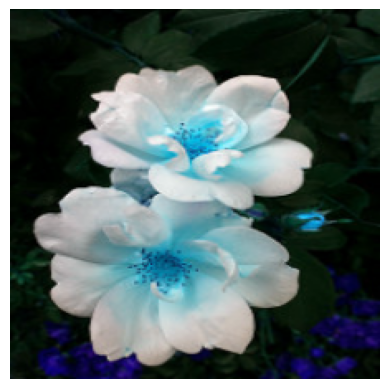

In [35]:
plt.axis('off')
plt.imshow(x[0])

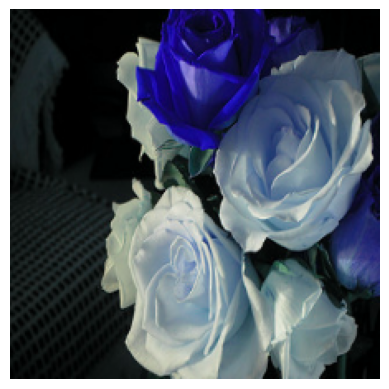

In [36]:
plt.axis('off')
plt.imshow(x[1])

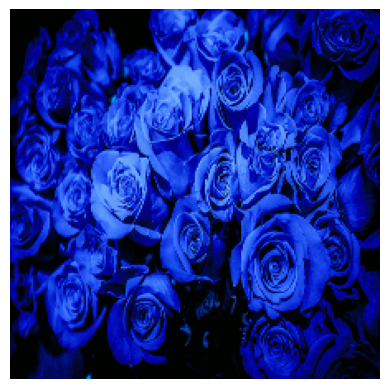

In [37]:
plt.axis('off')
plt.imshow(x[2])

In [41]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 9s 9s/step


array([795, 880, 795], dtype=int64)

## We will freeze inner dense layer and not use softmax layer, Use the outer layer of flower classifier.

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

## Model evaluation

In [ ]:
model.evaluate(X_test_scaled,y_test)